In [ ]:
'''
activation
활성화 함수 : linear(선형회귀) : 연속적인 값에 대한 결과를 가져올 때 
             sigmoid(참/거짓:이항) : 렐루(ReLU), 
                                    하이퍼볼릭 탄젠트(hyperbolic tangent) 
                                    소프트플러스(softplus) 
             softmax(다항분류 : 출력결과가 여러개인 경우) : 0.2 + 0.6 + 0.3 = 1 :최고값이 답
loss              
손실 함수 : 평균제곱 오차(mse) : mean_squared_error 
           평균절대 오차(mae)
           평균절대백분율오차(mape)
           평균제곱로그오차(msle) 
           이항교차엔트로피(binary_crossentropy):이항분류
           범주형교차엔트로피(calegorical_crossentropy) : 다항분류
optimizer           
오차 수정 함수: 경사 하강법(gd) : 확률적경사하강법(sgd) : 아다그라이드(adagrad) : 알엠에스프롭(RMSProp) : 아담(adam)
                                                       모멘텀(momentum)                            : 아담(adam)
metrics                                                                                                   : 네스레포트 모멘텀(NAG) 
모델 수행의 결과 출력 :  
            accuracy : 학습셋에 대한 정확도에 기반해 결과를 출력 
            loss : 학습셋에 대한 손실 값을 나타냄
            val_acc : 테스트셋에 대한 정확도를 나타냄
            val_loss : 테스트셋에 대한 손실 값을 나타냄
'''

@ 풀링(pooling) 또는 서브 샘플링(sub sampling)
<br /> - 크고 복잡한 것을 축소시킴
<br /> - 평균 값을 뽑아내는 평균 풀링(average pooling) 
<br /> - 정해진 구역 안에서 최댓값을 뽑아내는 맥스 풀링(max pooling)
<br /> - @ 맥스 플링
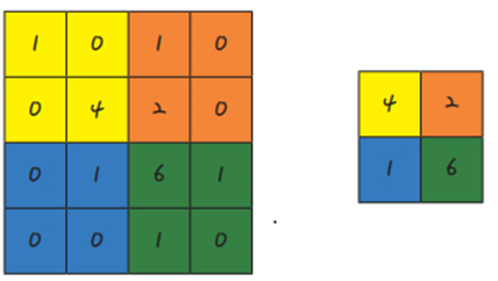


drop out
<br /> - 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는 것이 아니라는 점을 과적합 오류 발생
<br /> - 딥러닝에서 학습을 진행할 때 가장 중요한 것은 과적합을 얼마나 효과적으로 피해 가는지에 달려 있음
<br /> - 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼 주는 것
<br /> - model.add(Dropout(0.25)) 는 25%의 노드를 끄게 한다.
    <br />
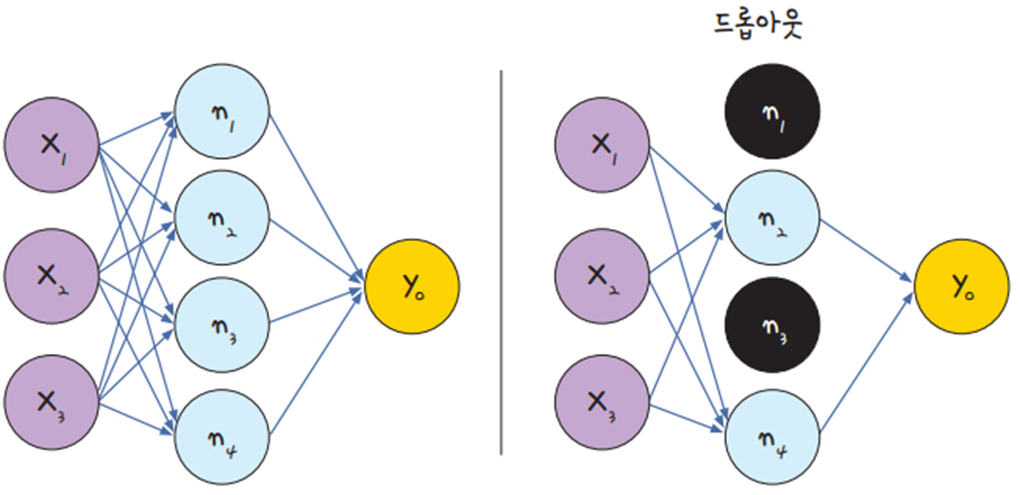  

@ 플래튼
<br /> - 2차원을 1차원으로 변경
<br /> - model.add(Flatten())

@ pad_sequences
<br /> - 서로 다른 길이의 데이터를 맞추어 주는 것

@ 합성곱 연산 - 컨볼루션 신경망(CNN)
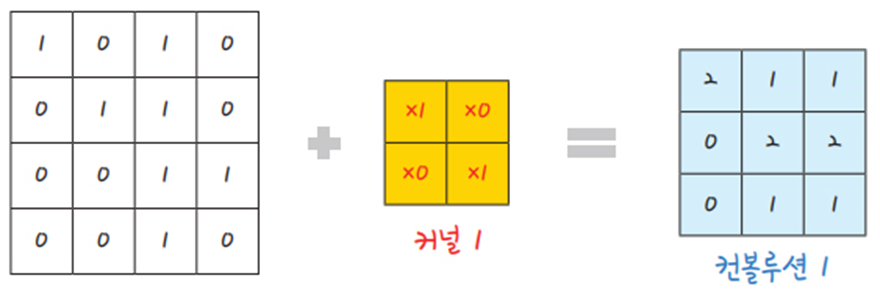
<br />
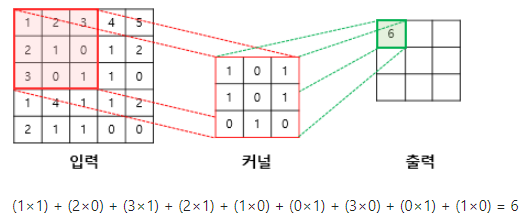
<br />
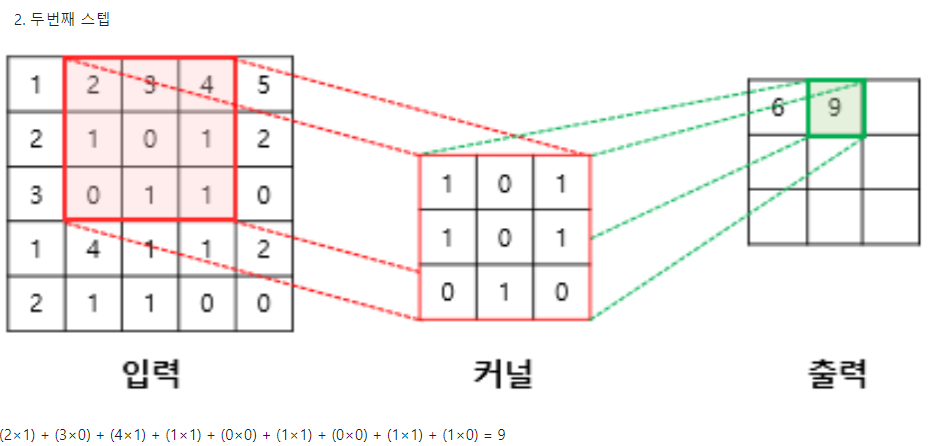

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# 데이터를 불러옴
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1 ).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1 ).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 모델 설정
model = Sequential()
# 컨볼루션 적용 : Conv2D
# 32는 커널의 갯수 , (3,3)는 커널의 크기, 
# input_shape = (행, 열, 색상 또는 흑백) : (28, 28, 1)
#                        흑백이면 1, 색상이면 3
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(28, 28,1), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
# 맥스 풀링 적용 : MaxPooling2D
# pool_size를 통해 풀링 창의 크기
# (2,2)는 가로 2, 세로 2 크기의 풀링 창을 통해 맥스 풀링을 진행 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # 노드를 25%를 끄고 사용
model.add(Flatten()) # 2차원을 1차원 변경 (28 , 28) => (784,)
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 모델 최적화
modelpath = "./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", \
                                verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10 )
# 모델실행
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train,y_train, epochs=30,batch_size=200,verbose=0 , \
         validation_split=0.25, callbacks=[early_stopping_callback,checkpointer])  
# 테스트 정확도를 출력
model.evaluate(X_test, y_test)[1]








Epoch 1: val_loss improved from inf to 0.07769, saving model to ./data/model\MNIST_CNN.hdf5


C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.07769 to 0.05665, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05665 to 0.05053, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05053 to 0.04961, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04961 to 0.04657, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04657 to 0.04543, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04543

Epoch 8: val_loss improved from 0.04543 to 0.04537, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04537 to 0.04065, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.04065

Epoch 11: val_loss did not improve from 0.04065

Epoch 12: val_loss did not improve from 0.04065

Epoch 13: val_loss did not improve from 0.04065

Epoch 14: val_loss did not improve from 0.04065

Epoch 15: val_loss did not 

0.9912999868392944

In [64]:
from PIL import Image
import numpy as np
# 이미지 전처리
image_path = 'img6.jpg'
image = Image.open(image_path)
image = image.convert('L')  # 흑백 이미지로 변환
image = image.resize((28, 28))  # 28x28 크기로 조정
image = np.asarray(image)
image = image.reshape(1, 28, 28, 1).astype('float32') / 255  # 모델 입력 형태에 맞게 재구성
if image[0, 0, 0, 0] > 0:  # 이미지 특성에 따라 조건을 조절하세요.
    image = abs(1 - image)
# 예측하기
prediction = model.predict(image)
digit = np.argmax(prediction)
print("예측 결과:", digit)

1/1 [==============================] - 0s 21ms/step
예측 결과: 5


In [ ]:
# 순환 신경망(Recurrent Neural Network, RNN) => LSTM(Long Short Term Memory)
# 입력된 값에 맞는 결과를 가져올 때 까지 한 곳에서 순환하는 것을 
# 첫번째 입력 값에 맞는 결과 값이 나올 때 까지 계속 순환
# 첫번째 입력 값에 대한 결과와 같이 두번째 입력 값으로 맞는 결과를 가져올 때까지 순환
# 첫번째 결과값 그리고 두번째 결과값과 함께 세번째 입력값에 맞는 결과를 가져올 때까지 순환
# 이와 같은 방법으로 반복해서 결과를 출력 
# RNN은 앞에 결과에 따라 뒤 입력값에 영향을 준다.
# 앞에 결과값을 관리할 필요가 있어서 LSTM을 이용해서 결과값을 관리하게 한다.

In [ ]:
# RNN 과 LSTM을 사용
# 로이터 뉴스 데이터셋
from tensorflow.keras.datasets import reuters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence

import numpy as np
# 데이터 불러오기
# 학습셋, 테스트셋
(X_train, y_train),(X_test, y_test) = \
                            reuters.load_data(num_words=1000, test_split = 0.2) 
# 카테고리 갯수
# 카테고리의 번호 : [0,1,2,3,4,5,..., 45]
np.max(y_train) + 1 # 
# 단어의 수를 맞어주기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 모델의 구조
model = Sequential()
#      Embedding(불러온 단어의 총수,기사당 단어 수)
model.add(Embedding(1000,100))
#         LSTM(기사당 단어 수, 기타 옵션) 
# LSTM를 사용한 경우 활성 함수는 tanh
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation="softmax"))
# 학습의 조기 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델의 실행
model.compile(loss="categorical_crossentropy" , optimizer="adam", 
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=20, epochs=200, \
         validation_data=(X_test, y_test),callbacks=[early_stopping_callback])
# validation_split=0.25
# 테스트 정확도
model.evaluate(X_test, y_test)[1]

Epoch 1/200
450/450 [==============================] - 14s 26ms/step - loss: 2.2414 - accuracy: 0.4334 - val_loss: 1.9409 - val_accuracy: 0.5191
Epoch 2/200
450/450 [==============================] - 11s 24ms/step - loss: 1.8993 - accuracy: 0.5090 - val_loss: 1.7812 - val_accuracy: 0.5543
Epoch 3/200
450/450 [==============================] - 11s 24ms/step - loss: 1.6928 - accuracy: 0.5637 - val_loss: 1.6534 - val_accuracy: 0.5775
Epoch 4/200
450/450 [==============================] - 11s 24ms/step - loss: 1.4685 - accuracy: 0.6256 - val_loss: 1.4748 - val_accuracy: 0.6291
Epoch 5/200
450/450 [==============================] - 11s 23ms/step - loss: 1.3155 - accuracy: 0.6698 - val_loss: 1.3599 - val_accuracy: 0.6625
Epoch 6/200
450/450 [==============================] - 11s 25ms/step - loss: 1.2110 - accuracy: 0.6918 - val_loss: 1.3401 - val_accuracy: 0.6679
Epoch 7/200
450/450 [==============================] - 11s 25ms/step - loss: 1.1231 - accuracy: 0.7153 - val_loss: 1.2856 - val_ac

In [68]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 입력 텍스트에 대한 토크나이저 피팅 수정
input_text = ["오늘 출근길에 차 사고가 났습니다."]
tokenizer = Tokenizer(num_words=1000)
# X_train이 아닌 input_text에 대해 피팅하도록 변경
tokenizer.fit_on_texts(input_text)  
input_sequence = tokenizer.texts_to_sequences(input_text)
input_sequence_padded = pad_sequences(input_sequence, maxlen=100)
# 훈련된 모델을 사용하여 예측
predictions = model.predict(input_sequence_padded)
# 예측된 카테고리 인덱스 가져오기
predicted_category_index = np.argmax(predictions[0])
# 인덱스를 원래 카테고리로 매핑 # 날씨 , 주식, 사회, 정치
print(f"예측된 카테고리 인덱스: {predicted_category_index}")

1/1 [==============================] - 0s 24ms/step
예측된 카테고리 인덱스: 15


In [59]:
#LSTM과 CNN(컨볼루션)의 조합을 이용한 영화 리뷰 분류하기
from tensorflow.keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100)) # RNN
model.add(Dropout(0.5))
# Conv2D : 2차원
# Conv1D : 1차원
model.add(Conv1D(64, 5, padding="valid", activation="relu" , strides=1)) #CNN
model.add(MaxPooling1D(pool_size=4))  #CNN
model.add(LSTM(55)) # 
model.add(Dense(1))
model.add(Activation("sigmoid"))
# model.add(Dense(1, activation = 'sigmoid'))
# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
# 모델의 실행 옵션을 정합니다.
model.compile(loss="binary_crossentropy", optimizer="adam" , metrics=['accuracy'])
# 테스트 정확도
model.evaluate(X_test, y_test)

782/782 [==============================] - 11s 14ms/step - loss: 0.6936 - accuracy: 0.5000


[0.693572998046875, 0.5]

In [ ]:
# 손글씨
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, Dropout, Flatten, Input
from tensorflow.keras.layers import BatchNormalization, UpSampling2D, Conv2D, Activation
import numpy as np
import matplotlib.pyplot as plt
# 모델생성
# 생산자 모델을 만듭니다.
generator = Sequential()
# 128은 임의의 수 128이 아니어도 됨, 100차원으로 입력. 100이 아니어도 됨,
# GAN에서는 ReLU함수가 불안해서 LeakyReLU함수 사용
# 이미지 크기 28*28 이므로 7 * 7이라고 함
generator.add(Dense(128 * 7 * 7 , input_dim=100 , activation = "LeakyReLU"))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())  # 7 * 7인 이미지를  14 * 14 
generator.add(Conv2D(64, kernel_size=5 , padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 14 * 14 인 이미지가 28 * 28
generator.add(Conv2D(1, kernel_size=5 , padding='same', activation="tanh"))
# 판별자 모델을 만듭니다.
discriminator = Sequential()
# 컨볼루션을 이용해서 만든다.
discriminator.add(Conv2D(64, kernel_size=5, strides = 2, input_shape=(28,28,1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides = 2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

# 판별자 실행
discriminator.compile(loss="binary_crossentropy",optimizer='adam')
# 판별자는 학습을 해서는 안됨
discriminator.trainable = False 

# 생산자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput =  Input(shape=(100,)) # input_dim=100
# 판별자에게 생산자가 만든 값을 전달
dis_output = discriminator(generator(ginput))
gan =  Model(ginput, dis_output)
gan.compile(loss="binary_crossentropy",optimizer='adam')

epoch = 2001
batch_size = 32  # 몇개의 가상이미지를 판별자에게 넣을지 결정하는 변수
# MNIST 데이터를 불러옵니다.
(X_train, _),(_, _) = mnist.load_data()
# 가로세로 28픽셀이고 흑색이므로 1
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
# 255로 나누면 0 ~ 1이죠... -1 ~ 1사이의 값을 가지도록
X_train = (X_train - 127) / 127

# 거짓과 참을 판별하기 위한 32행 1열
true = np.ones((batch_size, 1)) 
fake = np.zeros((batch_size, 1))

for i in range(epoch):
     # 실제 데이터를 판별자에 입력하는 부분입니다
    # 판별자에게 이미지를 랜덤하게 전달
    idx = np.random.randint(0, X_train.shape[0], batch_size)
      # 손글씨 이미지를 랜덤으로 불러옴
    imgs = X_train[idx]
    # 랜덤으로 불러온 이미지를 판별자에게 전달
    # train_on_batch : 판별시작
    d_loss_real = discriminator.train_on_batch(imgs,true)

    # 임의의 숫자 데이터 0 ~ 1
    # 가짜 데이터 생성
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)

     # 판별자와 생산자의 오차를 계산합니다.
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)
    print(d_loss, g_loss)

    if i % 200 == 0:
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = generator(noise)

        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5)
        count = 0
        for j in range(5):
            for k in range(5):
                axs[j, k].imshow(gen_imgs[count, : , :, 0],cmap="gray" )
                axs[j, k].axis('off')
                count +=1
        fig.savefig(f"./data/gan_images/gan_mnist_{i}.png")

1/1 [==============================] - 0s 99ms/step
0.6897671222686768 0.8668736815452576
1/1 [==============================] - 0s 27ms/step
0.4475308582186699 0.6888226866722107
1/1 [==============================] - 0s 27ms/step
0.43597722984850407 0.288788378238678
1/1 [==============================] - 0s 26ms/step
0.562815266661346 0.09585713595151901
1/1 [==============================] - 0s 26ms/step
0.7274595638737082 0.09588313102722168
1/1 [==============================] - 0s 28ms/step
0.6331844367086887 0.2022324651479721
1/1 [==============================] - 0s 27ms/step
0.49353475123643875 0.580272912979126
1/1 [==============================] - 0s 28ms/step
0.4773325026035309 0.9374199509620667
1/1 [==============================] - 0s 27ms/step
0.500428706407547 1.0202512741088867
1/1 [==============================] - 0s 30ms/step
0.41403059661388397 1.0409221649169922
1/1 [==============================] - 0s 28ms/step
0.36891472339630127 1.0316846370697021
1/1 [===

C:\Users\sdedu\AppData\Local\Temp\ipykernel_10100\2036859495.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(5,5)


1/1 [==============================] - 0s 26ms/step
0.5621544271707535 0.49237746000289917
1/1 [==============================] - 0s 26ms/step
0.833852231502533 0.7390125393867493
1/1 [==============================] - 0s 27ms/step
0.48732759058475494 1.0952633619308472
1/1 [==============================] - 0s 32ms/step
0.5349314212799072 1.0969603061676025
1/1 [==============================] - 0s 27ms/step
0.6706597805023193 0.8425881862640381
1/1 [==============================] - 0s 25ms/step
0.5902550518512726 0.7462795972824097
1/1 [==============================] - 0s 26ms/step
0.5554985404014587 0.7659516334533691
1/1 [==============================] - 0s 27ms/step
0.5211236327886581 0.8755878806114197
1/1 [==============================] - 0s 26ms/step
0.48933131992816925 0.8134058713912964
1/1 [==============================] - 0s 26ms/step
0.5210592150688171 0.8385505676269531
1/1 [==============================] - 0s 35ms/step
0.47742241621017456 0.7475422620773315
1/1 [==